# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

### Data Analysis

#### Import

In [2]:
import openpyxl
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.optimize import curve_fit

#### 1. Data Import

In [9]:
n_values = [
    10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    150, 200, 250, 300, 400, 500, 600, 700,
    800, 900, 1000, 1100, 1200, 1300, 1400,
    1500, 2000, 2500, 3000
]

base_path = "/Users/evan/Desktop/Capstone_Project/Implementation"

fortune_path   = os.path.join(base_path, "classical_algorithm", "evan_file", "analysis_copy.xlsx")
asano_path     = os.path.join(base_path, "constant_workspace_algorithm", "evan_file", "analysis.xlsx")
banyassady_path_s_n= os.path.join(base_path, "deterministic_algorithm",  "evan_file", "analysis_s_n_copy.xlsx")
banyassady_path_s_n_2 = os.path.join(base_path, "deterministic_algorithm",  "evan_file", "analysis_s_n_2_copy.xlsx")
banyassady_path_s_n_2_5 = os.path.join(base_path, "deterministic_algorithm",  "evan_file", "analysis_s_n_2_5_copy.xlsx")
# banyassady_path_s_n_3 = os.path.join(base_path, "deterministic_algorithm",  "evan_file", "analysis_s_n_3.xlsx")

def read_times_and_memory(filepath):
    wb = openpyxl.load_workbook(filepath, data_only=True)
    ws = wb.active
    row = ws[105]
    times  = [c.value for i, c in enumerate(row) if i % 2 == 0]
    memory = [c.value for i, c in enumerate(row) if i % 2 == 1]
    return times, memory

fortune_times,   fortune_memory   = read_times_and_memory(fortune_path)
asano_times,     asano_memory     = read_times_and_memory(asano_path)
banyassady_times_s_n,banyassady_memory_s_n= read_times_and_memory(banyassady_path_s_n)
banyassady_times_s_n_2,banyassady_memory_s_n_2= read_times_and_memory(banyassady_path_s_n_2)
banyassady_times_s_n_2_5,banyassady_memory_s_n_2_5= read_times_and_memory(banyassady_path_s_n_2_5)
# banyassady_times_s_n_3,banyassady_memory_s_n_3= read_times_and_memory(banyassady_path_s_n_3)

print(fortune_memory)
print(asano_memory)
print(banyassady_memory_s_n)
print(banyassady_memory_s_n_2)
print(banyassady_memory_s_n_2_5)

[33.90752500000001, 70.04579000000001, 96.47744, 131.69805000000002, 175.11835000000002, 200.64237999999997, 238.05193500000004, 271.89228999999995, 307.928115, 350.420215, 513.0982449999999, 683.0238200000001, 879.3056650000002, 1038.62763, 1374.0502900000001, 1719.1176649999998, 2057.797555, 2542.08788, 2826.7870000000007, 3169.5308600000003, 3493.642770000001, 3845.75195, 4088.0718799999995, 4542.05312, 4741.793360000001, 5303.729280000001, 7000.41214, 8910.062479999999, 10590.60976]
[1.30508, 1.324995, 1.32382, 1.324995, 1.32382, 1.324995, 1.3226550000000001, 1.3226499999999999, 1.324995, 1.3302888888888889, 1.3305562499999999, 1.3328066666666667, 1.3207647058823528, 1.47604, 1.549718181818182, 1.5699545454545452, 1.5846444444444445, 1.6175166666666667, 1.6381363636363637, 1.6506714285714286, 1.6569166666666668, 1.6633, 1.5055999999999998, 1.5156000000000003, 1.51872, 1.5302499999999999, 1.5398399999999999, 1.5508, 1.7695]
[76.51776000000001, 134.48185, 159.13272, 211.58642, 241.77

#### 2. a). # vertices vs. memory in KB

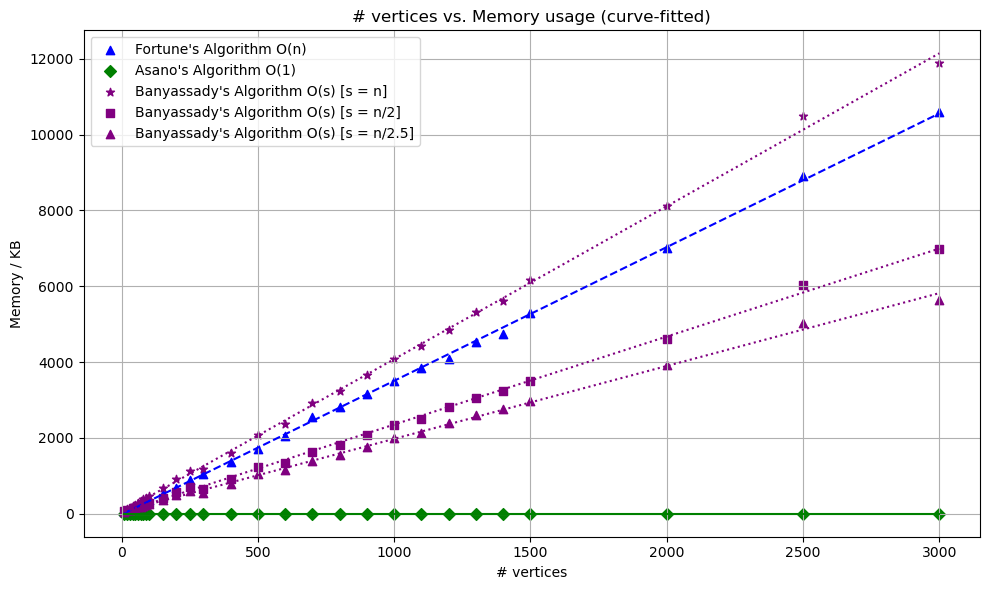

In [10]:
# ------------------------------------------
# 原实验数据
n_vals   = np.asarray(n_values)          # x 轴：点数
y_fort   = np.asarray(fortune_memory)    # Fortune 实测内存
y_asano  = np.asarray(asano_memory)      # Asano  实测内存
y_bany_s_n = np.asarray(banyassady_memory_s_n)
y_bany_s_n_2 = np.asarray(banyassady_memory_s_n_2)
y_bany_s_n_2_5 = np.asarray(banyassady_memory_s_n_2_5)

# ------------------------------------------

# ---------- 1. 定义理论模型 ----------
def f_linear(n, a, b):      # Fortune：O(n)  → 线性
    return a * n + b

def f_const(n, c):          # Asano：O(1) → 常数
    return c * np.ones_like(n)

# ---------- 2. 用 curve_fit 找最佳参数 ----------
popt_f, _ = curve_fit(f_linear, n_vals, y_fort)
popt_a, _ = curve_fit(f_const,  n_vals, y_asano)
popt_b_s_n, _ = curve_fit(f_linear, n_vals, y_bany_s_n)
popt_b_s_n_2, _ = curve_fit(f_linear, n_vals, y_bany_s_n_2)
popt_b_s_n_2_5, _ = curve_fit(f_linear, n_vals, y_bany_s_n_2_5)

# ---------- 3. 生成“平滑”曲线 ----------
n_smooth = np.linspace(n_vals.min(), n_vals.max(), 300)
y_f_smooth = f_linear(n_smooth, *popt_f)
y_a_smooth = f_const(n_smooth,  *popt_a)
y_b_s_n_smooth = f_linear(n_smooth, *popt_b_s_n)
y_b_s_n_2_smooth = f_linear(n_smooth, *popt_b_s_n_2)
y_b_s_n_2_5_smooth = f_linear(n_smooth, *popt_b_s_n_2_5)

# ---------- 4. 画图 ----------
plt.figure(figsize=(10, 6))

# (a) 原始观测值：散点
plt.scatter(n_vals, y_fort,  marker='^', color='blue',
            label="Fortune's Algorithm O(n)")
plt.scatter(n_vals, y_asano, marker='D', color='green',
            label="Asano's Algorithm O(1)")

plt.scatter(n_vals, y_bany_s_n, marker='*', color='purple',
            label="Banyassady's Algorithm O(s) [s = n]")
plt.scatter(n_vals, y_bany_s_n_2, marker='s', color='purple',
            label="Banyassady's Algorithm O(s) [s = n/2]")
plt.scatter(n_vals, y_bany_s_n_2_5, marker='^', color='purple',
            label="Banyassady's Algorithm O(s) [s = n/2.5]")

# (b) 拟合曲线：平滑线
plt.plot(n_smooth, y_f_smooth, '--', color='blue')

# plt.plot(n_smooth, y_f_smooth, '--', color='blue',
#          label=r"fit: $y = {:.3f}\,n + {:.3f}$".format(*popt_f))

plt.plot(n_smooth, y_a_smooth, '-',  color='green')

# plt.plot(n_smooth, y_a_smooth, '-',  color='green',
#          label=r"fit: $y = {:.3f}$".format(*popt_a))

plt.plot(n_smooth, y_b_s_n_smooth, ':', color='purple')
plt.plot(n_smooth, y_b_s_n_2_smooth, ':', color='purple')
plt.plot(n_smooth, y_b_s_n_2_5_smooth, ':', color='purple')

plt.xlabel('# vertices')
plt.ylabel('Memory / KB')
plt.title('# vertices vs. Memory usage (curve-fitted)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. b). # vertices vs. time in s

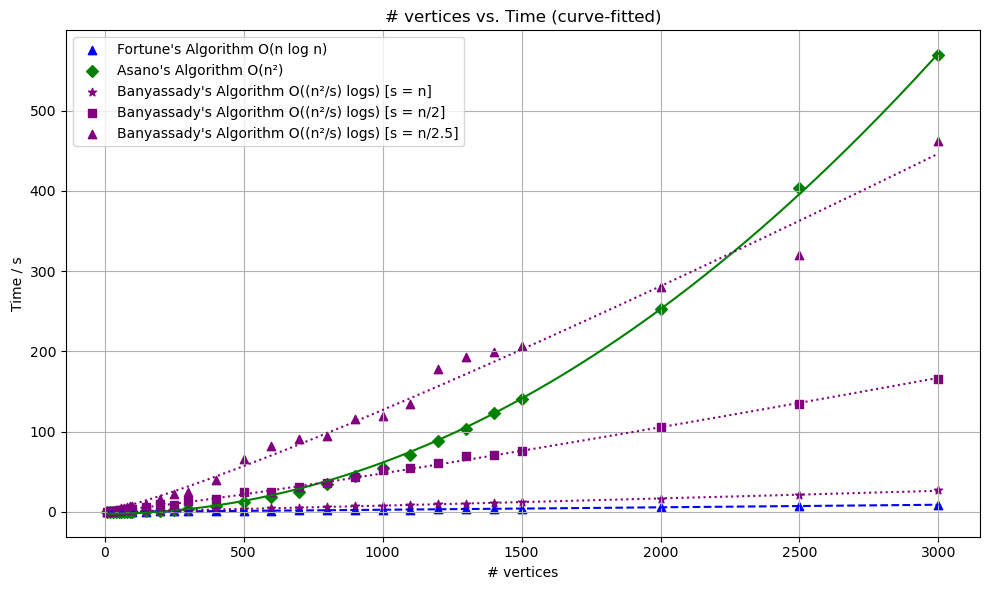

In [65]:
# ---------- 0. 准备数据 ----------
n_vals  = np.asarray(n_values)
t_fort  = np.asarray(fortune_times)
t_asano = np.asarray(asano_times)
t_bany_s_n = np.asarray(banyassady_times_s_n)
t_bany_s_n_2 = np.asarray(banyassady_times_s_n_2)
t_bany_s_n_2_5 = np.asarray(banyassady_times_s_n_2_5)
# t_bany_s_n_3 = np.asarray(banyassady_times_s_n_3)

# ---------- 1. 定义模型 ----------
def f_nlogn(n, k, b):        # Fortune  : k·n·log₂n + b
    return k * n * np.log2(n) + b

def f_n2(n, k, b):           # Asano    : k·n² + b
    return k * n**2 + b

def make_bany_model(s_of_n):
    def model(n, k, b):
        s = s_of_n(n)
        return k * n**2 / s * np.log2(s) + b
    return model

# ---------- 2. 拟合参数 ----------
popt_f, _ = curve_fit(f_nlogn, n_vals, t_fort,  p0=(1e-6, 0))
popt_a, _ = curve_fit(f_n2,    n_vals, t_asano, p0=(1e-9, 0))

# s = n
model_s_n = make_bany_model(lambda n: n)
popt_b_s_n, _ = curve_fit(model_s_n, n_vals, t_bany_s_n, p0=(1e-6, 0))

# s = n/2
model_s_n_2 = make_bany_model(lambda n: n/2)
popt_b_s_n_2, _ = curve_fit(model_s_n_2, n_vals, t_bany_s_n_2, p0=(1e-6, 0))

# s = n/2.5
model_s_n_2_5 = make_bany_model(lambda n: n/2.5)
popt_b_s_n_2_5, _ = curve_fit(model_s_n_2_5, n_vals, t_bany_s_n_2_5, p0=(1e-6, 0))

# s = n/3
# model_s_n_3 = make_bany_model(lambda n: n/3)
# popt_b_s_n_3, _ = curve_fit(model_s_n_3, n_vals, t_bany_s_n_3, p0=(1e-6, 0))

# ---------- 3. 生成平滑曲线 ----------
n_smooth   = np.linspace(n_vals.min(), n_vals.max(), 300)
t_f_smooth = f_nlogn(n_smooth, *popt_f)
t_a_smooth = f_n2(n_smooth,    *popt_a)
t_b_s_n_smooth = model_s_n(n_smooth, *popt_b_s_n)
t_b_s_n_2_smooth = model_s_n_2(n_smooth, *popt_b_s_n_2)
t_b_s_n_2_5_smooth = model_s_n_2_5(n_smooth, *popt_b_s_n_2_5)
# t_b_s_n_3_smooth = model_s_n_3(n_smooth, *popt_b_s_n_3)

# ---------- 4. 画图 ----------
plt.figure(figsize=(10, 6))

# -- 原始观测值 (散点) --
plt.scatter(n_vals, t_fort,  marker='^', color='blue',
            label="Fortune's Algorithm O(n log n)")
plt.scatter(n_vals, t_asano, marker='D', color='green',
            label="Asano's Algorithm O(n²)")
plt.scatter(n_vals, t_bany_s_n, marker='*', color='purple',
            label="Banyassady's Algorithm O((n²/s) logs) [s = n]")
plt.scatter(n_vals, t_bany_s_n_2, marker='s', color='purple',
            label="Banyassady's Algorithm O((n²/s) logs) [s = n/2]")
plt.scatter(n_vals, t_bany_s_n_2_5, marker='^', color='purple',
            label="Banyassady's Algorithm O((n²/s) logs) [s = n/2.5]")
# plt.scatter(n_vals, t_bany_s_n_3, marker='D', color='purple',
#             label="Banyassady's Algorithm O((n²/s) logs) [s = n/3]")

# -- 拟合曲线 (平滑) --
plt.plot(n_smooth, t_f_smooth, '--', color='blue')

# plt.plot(n_smooth, t_f_smooth, '--', color='blue',
#          label=r"fit: $t = {:.2e}\,n\log n + {:.2e}$".format(*popt_f))

plt.plot(n_smooth, t_a_smooth, '-',  color='green')

# plt.plot(n_smooth, t_a_smooth, '-',  color='green',
#          label=r"fit: $t = {:.2e}\,n^2 + {:.2e}$".format(*popt_a))

plt.plot(n_smooth, t_b_s_n_smooth, ':', color='purple')
plt.plot(n_smooth, t_b_s_n_2_smooth, ':', color='purple')
plt.plot(n_smooth, t_b_s_n_2_5_smooth, ':', color='purple')
# plt.plot(n_smooth, t_b_s_n_3_smooth, ':', color='purple')

plt.xlabel('# vertices')
plt.ylabel('Time / s')
plt.title('# vertices vs. Time (curve-fitted)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()